In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.datasets import cifar10
from keras.models import model_from_json
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128
epochs = 50

In [0]:
num_classes = 10
path = '/content/drive/My Drive/cifar10/'
model_name = path + '50_model.json'
weights_name = path + '50_weights.h5'

In [0]:
def predict(x, model):
    pred = model.predict(np.array([x]), batch_size=1)
    pred_class = np.argmax(pred)
    pred_per = max(pred[0])
    
    return pred_class, pred_per

In [6]:
# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 正規化
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

y_train_catego = to_categorical(y_train, num_classes)
y_test_catego = to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 11s 0us/step
50000 train samples
10000 test samples


In [7]:
adv_train = np.load(path + 'npy/advs_train_50_model.npy')
adv_test = np.load(path + 'npy/advs_test_50_model.npy')

print(adv_train.shape[0], 'adv train samples')
print(adv_test.shape[0], 'adv test samples')

50000 adv train samples
10000 adv test samples


In [8]:
model = model_from_json(open(model_name).read())
model.load_weights(weights_name)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.










In [9]:
score = model.evaluate(x_test, y_test_catego, verbose=0)
print('x_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

x_test
Test loss : 0.6737617504119873
Test accuracy : 0.8067


In [10]:
score = model.evaluate(adv_test, y_test_catego, verbose=0)
print('adv_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

adv_test
Test loss : 3.8524660678863527
Test accuracy : 0.329


In [0]:
label =['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

adv_test
p: pred_class, t: true_class


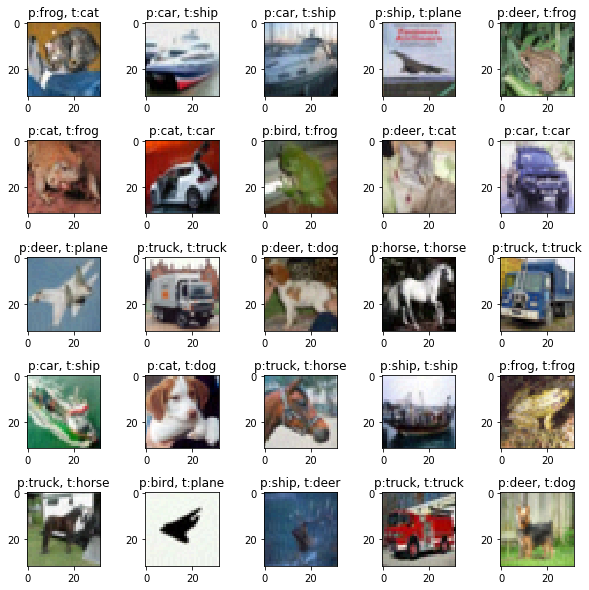

In [12]:
print('adv_test')
print('p: pred_class, t: true_class')
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    
    img = adv_test[i]
    pred_class, pred_per = predict(img, model)
    plt.imshow(img)
    plt.title('p:{0}, t:{1}'.format(label[pred_class],label[int(y_test[i])]))

plt.show()

x_test
p: pred_class, t: true_class


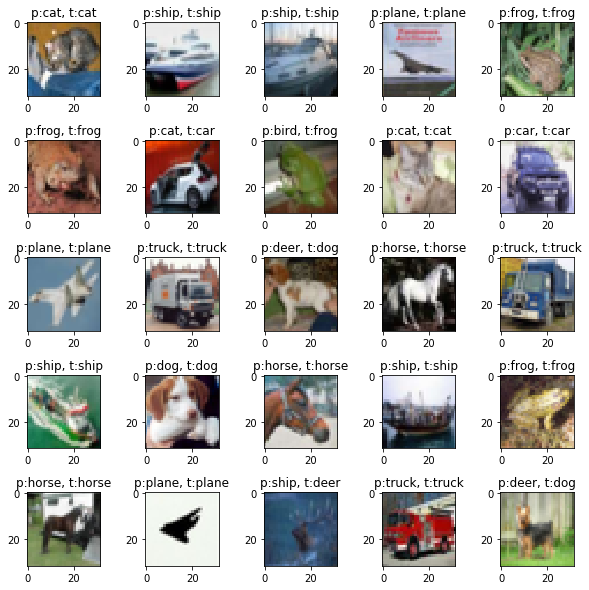

In [13]:
print('x_test')
print('p: pred_class, t: true_class')
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(25):
    cifar_img=plt.subplot(5,5,i+1)
    
    img = x_test[i]
    pred_class, pred_per = predict(img, model)
    plt.imshow(img)
    plt.title('p:{0}, t:{1}'.format(label[pred_class],label[int(y_test[i])]))

plt.show()

In [14]:
history = model.fit(adv_train, y_train_catego,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_catego))

model_json_str = model.to_json()
open(path + 'gpu_advs_50e_model.json', 'w').write(model_json_str)
model.save_weights(path + 'gpu_advs_50e_weights.h5');
print('model saved.')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.8370 - acc: 0.6972 - val_loss: 0.6485 - val_acc: 0.7811
Epoch 2/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6836 - acc: 0.7498 - val_loss: 0.6465 - val_acc: 0.7811
Epoch 3/50
50000/50000 [==============================] - 11s 226us/step - loss: 0.6307 - acc: 0.7686 - val_loss: 0.6477 - val_acc: 0.7822
Epoch 4/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.6051 - acc: 0.7796 - val_loss: 0.6302 - val_acc: 0.7813
Epoch 5/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.5794 - acc: 0.7897 - val_loss: 0.6365 - val_acc: 0.7877
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 0.5594 - acc: 0.7952 - val_loss: 0.6457 - val_acc: 0.7864
Epoch 7/50
50000/500

In [15]:
score = model.evaluate(x_test, y_test_catego, verbose=0)
print('x_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

x_test
Test loss : 0.7031236176967621
Test accuracy : 0.7905


In [17]:
score = model.evaluate(adv_test, y_test_catego, verbose=0)
print('adv_test')
print('Test loss :', score[0])
print('Test accuracy :', score[1])

adv_test
Test loss : 0.8998825386047363
Test accuracy : 0.7412


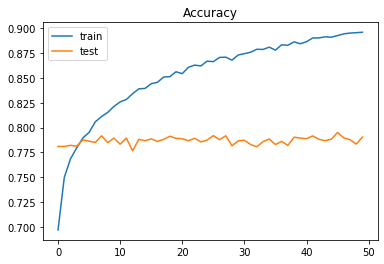

In [18]:
# 正解率の推移をプロット
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

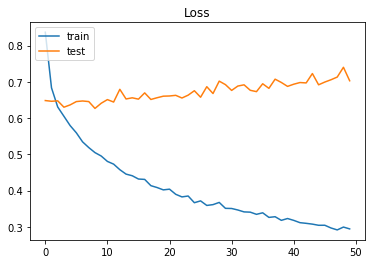

In [19]:
plt.cla()

# ロスの推移をプロット
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()